In [1]:
# General
import numpy as np
import pandas as pd
import nltk
import random
import os
from os import path
from PIL import Image

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

# Set Plot Theme
sns.set_palette([
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
])

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

# Modeling
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter
from gensim.models import word2vec

# Warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd drive/MyDrive

/content/drive/MyDrive


In [7]:
df = pd.read_csv('train_clean_removed_emoticons.csv')

In [8]:
df.drop(df.columns[0],inplace=True, axis=1)

In [9]:
# Word Length
df["Word Count"] = df['Review Text'].str.split().apply(len)

In [10]:
# Character Length
df["Character Count"] = df['Review Text'].apply(len)

In [11]:
# Int for Positive and Negative Reviews
df["Label"] = 0
df.loc[df.Rating < 3,["Label"]] = 0
df.loc[df.Rating == 3,["Label"]] = 1
df.loc[df.Rating > 3,["Label"]] = 2

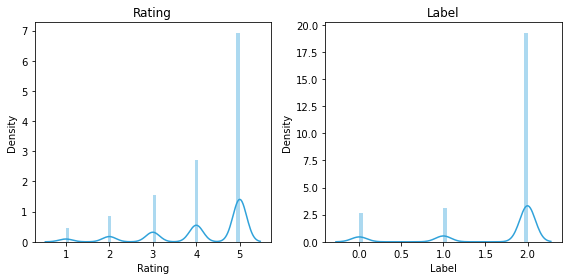

In [12]:
# Continous Distributions
f, ax = plt.subplots(1,2,figsize=(8,4), sharey=False)
sns.distplot(df.Rating, ax=ax[0])
ax[0].set_title("Rating")
ax[0].set_ylabel("Density")

sns.distplot(df.Label, ax=ax[1])
ax[1].set_title("Label")
ax[1].set_ylabel("Density")

plt.tight_layout()
plt.show()

# Most common words

One gram

In [13]:
stopwords = set(STOPWORDS)
size = (10,7)

def cloud(text, title, stopwords=stopwords, size=size):
    """
    Function to plot WordCloud
    Includes: 
    """
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    # Redundant when combined with my Preprocessing function
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))
    
    # Output Visualization
    fig = plt.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=50,color='y')
    plt.tight_layout(pad=0)
    plt.show()
    
# Frequency Calculation [One-Gram]
def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    return rslt

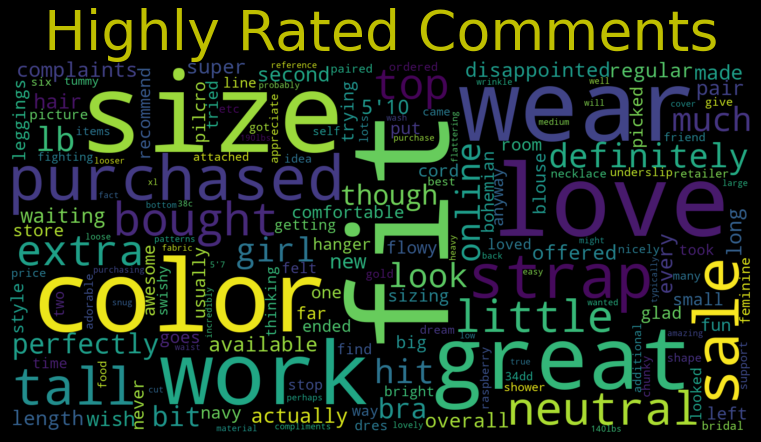

In [14]:
# Highly Raited
title ="Highly Rated Comments"
temp = df['Review Text'][df.Rating.astype(int) > 3]
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite"])

# Cloud
cloud(text= temp.values, title=title,stopwords= new_stop)

In [15]:
# Cloud
#a = cloud(text= temp.values, title=title,stopwords= new_stop)
wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=new_stop,
                         ).generate(str(temp.values))

wordcloud.words_                  


{'140lbs': 0.125,
 '190lbs': 0.125,
 '34dd': 0.125,
 '38c': 0.125,
 "5'10": 0.125,
 "5'7": 0.125,
 'actually': 0.125,
 'additional': 0.125,
 'adorable': 0.125,
 'amazing': 0.125,
 'anyway': 0.125,
 'appreciate': 0.125,
 'attached': 0.125,
 'available': 0.125,
 'awesome': 0.125,
 'back': 0.125,
 'best': 0.125,
 'big': 0.125,
 'bit': 0.25,
 'blouse': 0.125,
 'bohemian': 0.125,
 'bottom': 0.125,
 'bought': 0.25,
 'bra': 0.25,
 'bridal': 0.125,
 'bright': 0.125,
 'came': 0.125,
 'chunky': 0.125,
 'color': 0.5,
 'comfortable': 0.125,
 'complaints': 0.125,
 'compliments': 0.125,
 'cord': 0.125,
 'cover': 0.125,
 'cut': 0.125,
 'definitely': 0.25,
 'disappointed': 0.125,
 'dream': 0.125,
 'dres': 0.125,
 'easy': 0.125,
 'ended': 0.125,
 'etc': 0.125,
 'every': 0.125,
 'extra': 0.25,
 'fabric': 0.125,
 'fact': 0.125,
 'far': 0.125,
 'felt': 0.125,
 'feminine': 0.125,
 'fighting': 0.125,
 'find': 0.125,
 'fit': 1.0,
 'flattering': 0.125,
 'flowy': 0.125,
 'food': 0.125,
 'friend': 0.125,
 'fun'

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
#ps = LancasterStemmer()
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ')           #1
    words = tokenizer.tokenize(txt)                   #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words]              #4
    return words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


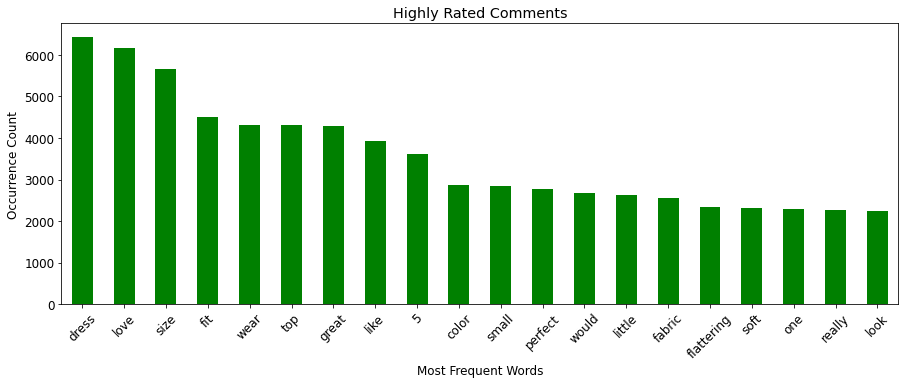

In [17]:
wordfreq(preprocessing(temp),20).plot.bar(rot=45, legend=False,figsize=(15,5), color='g',
                          title= title)
plt.ylabel("Occurrence Count")
plt.xlabel("Most Frequent Words")
plt.show()

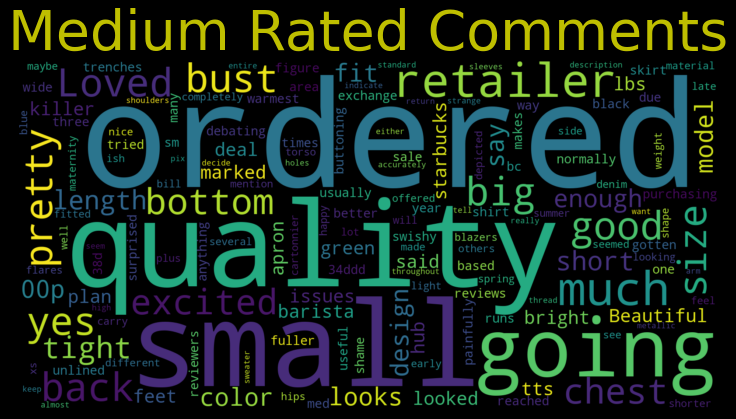

In [18]:
# Medium Raited
title ="Medium Rated Comments"
temp = df['Review Text'][df.Rating.astype(int) == 3]
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite", "jacket", "blazer"])

# Cloud
cloud(text= temp.values, title=title,stopwords= new_stop)

In [19]:
# Cloud
wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=new_stop,
                         ).generate(str(temp.values))

wordcloud.words_     

{'00p': 0.4,
 '34ddd': 0.2,
 '38d': 0.2,
 'Beautiful': 0.2,
 'Loved': 0.4,
 'accurately': 0.2,
 'almost': 0.2,
 'anything': 0.2,
 'apron': 0.2,
 'area': 0.2,
 'arm': 0.2,
 'back': 0.4,
 'barista': 0.2,
 'based': 0.2,
 'bc': 0.2,
 'better': 0.2,
 'big': 0.4,
 'bill': 0.2,
 'black': 0.2,
 'blazers': 0.2,
 'blue': 0.2,
 'bottom': 0.4,
 'bright': 0.2,
 'bust': 0.4,
 'buttoning': 0.2,
 'carry': 0.2,
 'cartonnier': 0.2,
 'chest': 0.4,
 'color': 0.4,
 'completely': 0.2,
 'deal': 0.2,
 'debating': 0.2,
 'decide': 0.2,
 'denim': 0.2,
 'depicted': 0.2,
 'description': 0.2,
 'design': 0.4,
 'different': 0.2,
 'due': 0.2,
 'early': 0.2,
 'either': 0.2,
 'enough': 0.4,
 'entire': 0.2,
 'exchange': 0.2,
 'excited': 0.4,
 'feel': 0.2,
 'feet': 0.2,
 'figure': 0.2,
 'fit': 0.4,
 'fitted': 0.2,
 'flares': 0.2,
 'fuller': 0.2,
 'going': 0.6,
 'good': 0.4,
 'gotten': 0.2,
 'green': 0.2,
 'happy': 0.2,
 'high': 0.2,
 'hips': 0.2,
 'holes': 0.2,
 'hub': 0.2,
 'indicate': 0.2,
 'ish': 0.2,
 'issues': 0.2,
 

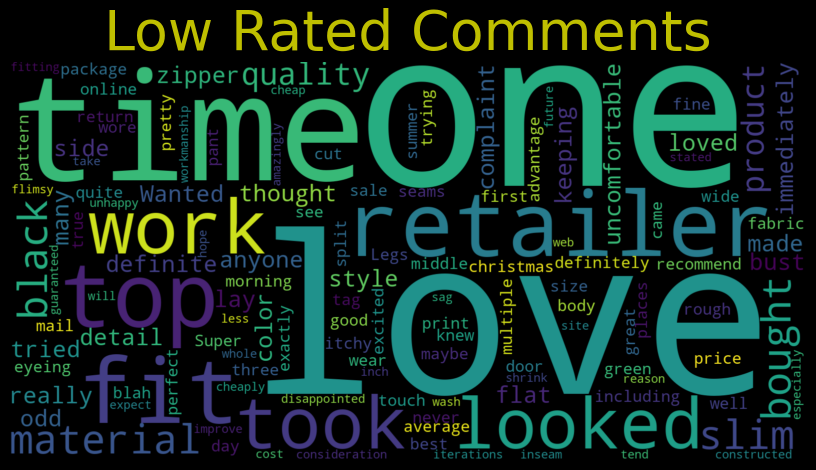

In [20]:
# Low Raited
title ="Low Rated Comments"
temp = df['Review Text'][df.Rating.astype(int) < 3]
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite", "jacket", "blazer"])

# Cloud
cloud(text= temp.values, title=title,stopwords= new_stop)

In [21]:
# Cloud
wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=new_stop,
                         ).generate(str(temp.values))

wordcloud.words_  

{'Legs': 0.3333333333333333,
 'Super': 0.3333333333333333,
 'Wanted': 0.3333333333333333,
 'advantage': 0.3333333333333333,
 'amazingly': 0.3333333333333333,
 'anyone': 0.3333333333333333,
 'average': 0.3333333333333333,
 'best': 0.3333333333333333,
 'black': 0.6666666666666666,
 'blah': 0.3333333333333333,
 'body': 0.3333333333333333,
 'bought': 0.6666666666666666,
 'bust': 0.3333333333333333,
 'came': 0.3333333333333333,
 'cheap': 0.3333333333333333,
 'cheaply': 0.3333333333333333,
 'christmas': 0.3333333333333333,
 'color': 0.3333333333333333,
 'complaint': 0.3333333333333333,
 'consideration': 0.3333333333333333,
 'constructed': 0.3333333333333333,
 'cost': 0.3333333333333333,
 'cut': 0.3333333333333333,
 'day': 0.3333333333333333,
 'definite': 0.3333333333333333,
 'definitely': 0.3333333333333333,
 'detail': 0.3333333333333333,
 'disappointed': 0.3333333333333333,
 'door': 0.3333333333333333,
 'especially': 0.3333333333333333,
 'exactly': 0.3333333333333333,
 'excited': 0.33333333

N grams

In [22]:
## Helper Functions
from nltk.util import ngrams
from collections import Counter
def get_ngrams(text, n):
    n_grams = ngrams((text), n)
    return [ ' '.join(grams) for grams in n_grams]

def gramfreq(text,n,num):
    # Extracting bigrams
    result = get_ngrams(text,n)
    # Counting bigrams
    result_count = Counter(result)
    # Converting to the result to a data frame
    df = pd.DataFrame.from_dict(result_count, orient='index')
    df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index column name
    return df.sort_values(["frequency"],ascending=[0])[:num]

def gram_table(data, gram, length):
    out = pd.DataFrame(index=None)
    for i in gram:
        table = pd.DataFrame(gramfreq(preprocessing(data),i,length).reset_index())
        table.columns = ["{}-Gram".format(i),"Occurrence"]
        out = pd.concat([out, table], axis=1)
    return out

In [23]:
print("Non-Recommended Items")
gram_table(data= df['Review Text'][df["Recommended IND"].astype(int) == 0], gram=[1,2,3,4,5], length=30)

Non-Recommended Items


,1-Gram,Occurrence,2-Gram,Occurrence,3-Gram,Occurrence,4-Gram,Occurrence,5-Gram,Occurrence
0,dress,1539,wanted love,186,really wanted love,53,really wanted like dress,8,reference 5 5 125 lbs,3
1,like,1443,going back,168,wanted love dress,39,really wanted love dress,8,reference 5 7 125 lb,3
2,top,1261,looked like,147,really wanted like,36,really wanted like top,8,reference measurements 38 30 40,3
3,fit,1093,looks like,128,made look like,23,looked like maternity top,7,photos reference measurements 38 30,3
4,would,1072,really wanted,122,wanted love top,23,5 4 120 lbs,7,medium photos reference measurements 38,3
5,fabric,1006,made look,111,fit true size,23,5 7 140 lbs,6,wearing medium photos reference measurements,3
6,size,968,look like,99,way much fabric,22,5 8 140 lbs,6,splurged pajama set regret even,2
7,back,820,true size,86,ordered usual size,20,wanted love dress much,5,jeans wanted pajama jeans would,2
8,look,762,felt like,85,like maternity top,19,really wanted love top,5,much stretchy wanted good pair,2
9,small,729,5 4,85,sadly going back,19,measurements 38 30 40,5,stretchy wanted good pair jeans,2


In [24]:
print("Recommended Items")
gram_table(data= df['Review Text'][df["Recommended IND"].astype(int) == 1], gram=[1,2,3,4,5], length=30)

Recommended Items


,1-Gram,Occurrence,2-Gram,Occurrence,3-Gram,Occurrence,4-Gram,Occurrence,5-Gram,Occurrence
0,dress,6863,true size,991,fits true size,200,compliments every time wear,35,34b 26 waist 36 hips,20
1,love,6394,love dress,518,fit true size,158,5 4 120 lbs,28,get compliments every time wear,16
2,size,6040,5 4,504,received many compliments,125,26 waist 36 hips,25,115 lbs 30 dd 26,14
3,fit,4785,usually wear,473,runs true size,114,looks great skinny jeans,23,5 2 currently 33 25,13
4,top,4595,looks great,462,love love love,108,34b 26 waist 36,20,lbs 30 dd 26 5,12
5,wear,4530,fit perfectly,446,usually wear size,89,115 lbs 30 dd,19,5 1 5 115 lbs,12
6,great,4431,well made,419,ordered usual size,66,love love love dress,18,30 dd 26 5 waist,10
7,like,4291,love top,405,every time wear,65,5 4 125 lbs,18,2 currently 33 25 37,10
8,5,3804,5 3,392,small fit perfectly,61,get compliments every time,18,115 lbs 30dd 26 5,10
9,color,3084,fits perfectly,385,small fits perfectly,57,usually wear size 4,16,5 5 tall 145 lbs,10


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


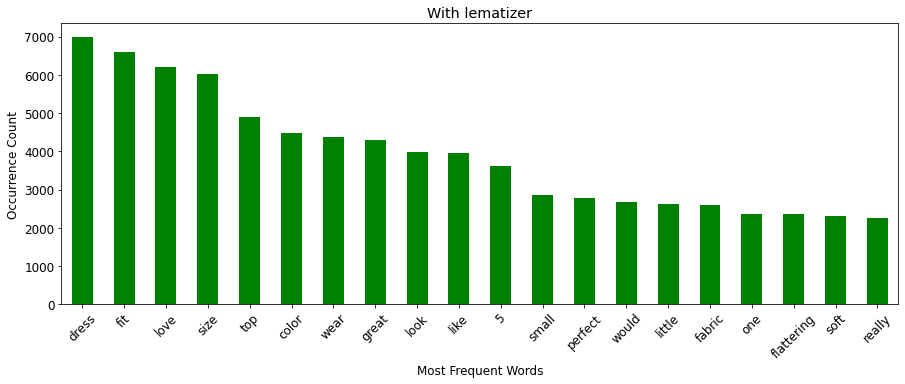

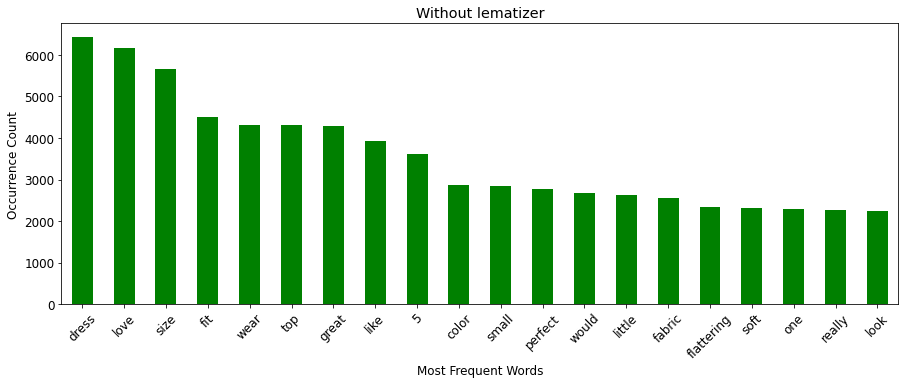

In [25]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
review_text = df['Review Text'][df.Rating.astype(int) > 3]

def lematize_preprocess(data):
  txt = data.str.lower().str.cat(sep=' ')                                 #1
  words = tokenizer.tokenize(txt)                                         #2
  words = [lemmatizer.lemmatize(w) for w in words if not w in stop_words] #3
  #words = [ps.stem(w) for w in words]                                    #4
  return words



lematized_text_list = []

lematized_text_list.extend(lematize_preprocess(review_text))

title = "With lematizer"

wordfreq(lematized_text_list,20).plot.bar(rot=45, legend=False,figsize=(15,5), color='g',
                          title= title)
plt.ylabel("Occurrence Count")
plt.xlabel("Most Frequent Words")
plt.show()

title = "Without lematizer"

wordfreq(preprocessing(review_text),20).plot.bar(rot=45, legend=False,figsize=(15,5), color='g',
                          title= title)
plt.ylabel("Occurrence Count")
plt.xlabel("Most Frequent Words")
plt.show()


Text(0, 0.5, 'Age')

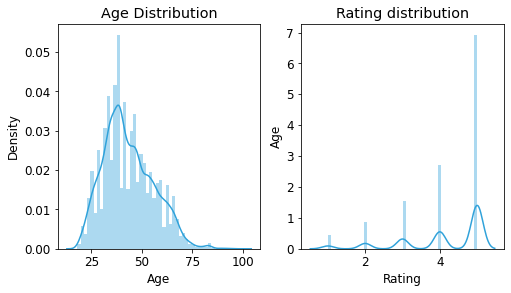

In [26]:
f, ax = plt.subplots(1,2,figsize=(8,4), sharey=False)
sns.distplot(df.Age, ax=ax[0])
ax[0].set_title("Age Distribution")
ax[0].set_ylabel("Density")

sns.distplot(df.Rating, ax=ax[1])
ax[1].set_title("Rating distribution")
ax[1].set_ylabel("Age")

Lematization with spacy 


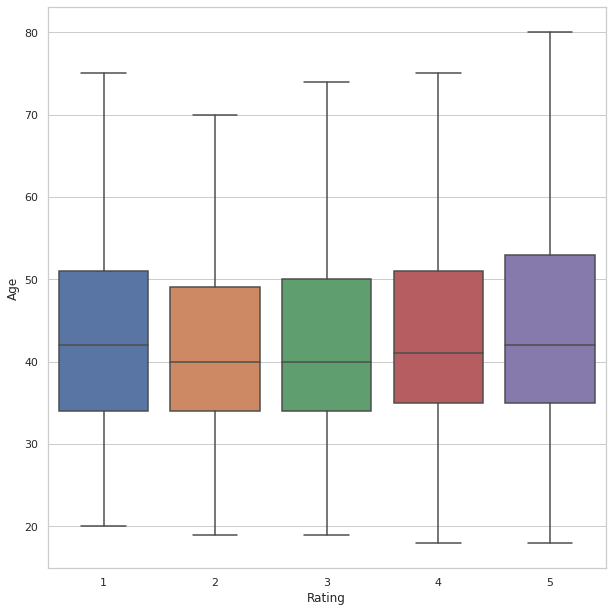

In [27]:
import seaborn as sns
sns.set_theme(style="whitegrid")


temp = df[['Rating', 'Age']] 
temp = temp[temp.Age.astype(int) < 81]  

rating1 = temp[temp.Rating.astype(int) == 1]
rating1 = rating1[rating1.Age.astype(int) < 77]

rating2 = temp[temp.Rating.astype(int) == 2]
rating2 = rating2[rating2.Age.astype(int) < 72]


rating3 = temp[temp.Rating.astype(int) == 3]
rating3 = rating3[rating3.Age.astype(int) < 75]

rating4 = temp[temp.Rating.astype(int) == 4]
rating4 = rating4[rating4.Age.astype(int) < 76]

rating5 = temp[temp.Rating.astype(int) == 5]


frames = [rating1, rating2, rating3, rating4, rating5]
result = pd.concat(frames)

ax1 = sns.boxplot(x="Rating", y="Age", data=result)

In [28]:
# !pip install spacytextblob
# !python -m textblob.download_corpora
# !python -m spacy download en_core_web_sm

In [29]:
import spacy
nlp = spacy.load("en_core_web_sm")

df['Lematized_Review_Text'] = ""

review_text = df['Review Text']


doc_list = []
for ind, x in enumerate(review_text):
  doc = nlp(x)
  
  var = " ".join([token.lemma_ for token in doc])
  df['Lematized_Review_Text'][ind] = var 
  doc_list.append([var])
  
df['Lematized_Review_Text']

0        beautiful dress . good quality . tts . -PRON- ...
1        these pant be so great . i be 5'10 and the tal...
2        -PRON- buy a size s in the navy , and m in the...
3        love this shirt but -PRON- run pretty big . -P...
4        -PRON- love this dress ! i be try on some dres...
                               ...                        
18108    just pick this up at -PRON- retailer and i jus...
18109    -PRON- be 5'4 , 34b , 106lbs and the 0 fit -PR...
18110    this dress look great on ... feminine and swis...
18111    -PRON- purchase this dress in the raspberry fo...
18112    -PRON- love this dress and will be purchase -P...
Name: Lematized_Review_Text, Length: 18113, dtype: object

# Embeddings Visualization

In [31]:
!pip install -q umap-learn
!pip install pyyaml==5.4.1

     |████████████████████████████████| 86 kB 3.1 MB/s 
     |████████████████████████████████| 1.1 MB 38.1 MB/s 
     |████████████████████████████████| 636 kB 5.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from umap import UMAP
import plotly.express as px
import plotly.graph_objects as go

from os.path import exists
import os 
import pickle
import warnings
warnings.filterwarnings("ignore")

In [33]:
def read_pickle(path):
  with open(path, "rb") as f:
    return pickle.load(f)

def write_pickle(path, object):
  with open(path, "wb") as f:
    return pickle.dump(object, f)

def get_indices(condition, array):
    return [i for i, elem in enumerate(array) if condition(elem)]

def filter_by_indices(indices, to_filter):
    return [l for i, l in enumerate(to_filter) if i in indices]

In [40]:
pickle_folder = '..\\..\\data\\pickle'
X_validation = read_pickle(os.path.join(pickle_folder, 'embeddings_validation.pkl'))
y_validation = read_pickle(os.path.join(pickle_folder, 'ratings_validation.pkl'))

In [41]:
umap_2d = UMAP(n_components=2, init='spectral', metric='cosine', n_epochs=300, n_neighbors=10)
umap_3d = UMAP(n_components=3, init='spectral', metric='cosine', n_epochs=300, n_neighbors=15)

proj_2d = umap_2d.fit_transform(X_validation)
proj_3d = umap_3d.fit_transform(X_validation)

In [42]:
unique_labels = list(sorted(set(y_validation)))
colors = ["red", "green", "blue", "goldenrod", "magenta"]

fig_2d = go.Figure(layout={"title": "2D Review embeddings", 
                            "legend":{"title":"Ratings"},
                            "height":700})

fig_3d = go.Figure(layout={"title": "3D Review embeddings", 
                            "legend":{"title":"Ratings"},
                            "height":700})

for label in unique_labels:
  indices = get_indices(lambda x: x == label, y_validation)
  proj_2d_filtered = filter_by_indices(indices, proj_2d)
  proj_2d_filtered = np.array(proj_2d_filtered)

  fig_2d.add_trace(go.Scatter(
    x = proj_2d_filtered[:,0], 
    y = proj_2d_filtered[:,1], 
    mode="markers", 
    name=f"Rating {label}",
    marker_sizemin=4,
    marker_color=colors[label-1]
  ))

  proj_3d_filtered = filter_by_indices(indices, proj_3d)
  proj_3d_filtered = np.array(proj_3d_filtered)

  fig_3d.add_trace(go.Scatter3d(
    x = proj_3d_filtered[:,0], 
    y = proj_3d_filtered[:,1], 
    z = proj_3d_filtered[:,2],
    mode="markers", 
    name=f"Rating {label}",
    marker_sizemin=4,
    marker_color=colors[label-1]
  ))


fig_2d.show()
fig_3d.show()

Not linearly separable in 2d/3d space 😞